# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset

For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [85]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [86]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()
df = pd.read_csv("SimData.dat", sep="\t")
df.head()
df.columns

Index(['X1', 'X2', 'Y'], dtype='object')

Is it a regression or a classification problem? Take into account that the target variable is "Y"

##### Dado que la variable Y es una variable categórica podemos decir en principio que se trata de un problema de clasificación

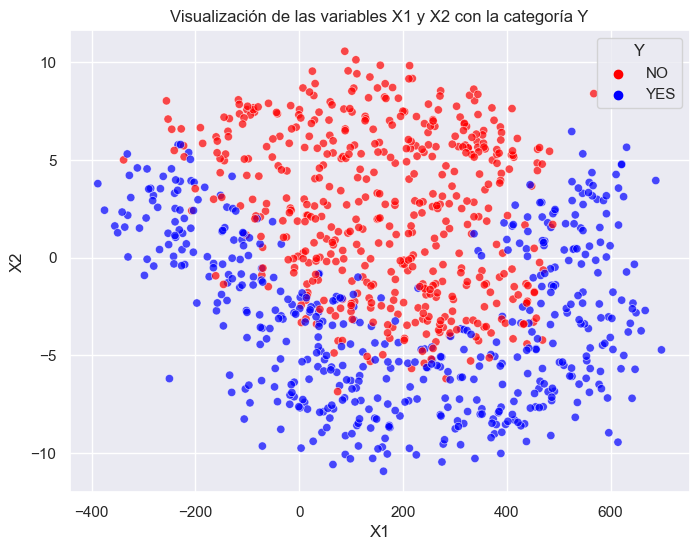

In [87]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot

# Visualización con un scatter plot usando Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='X1', y='X2', hue='Y', palette={'YES': 'blue', 'NO': 'red'}, alpha=0.7)

plt.title('Visualización de las variables X1 y X2 con la categoría Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Y')
plt.show()

## STEP 2: CHECK OUT THE MISSING VALUES

In [88]:
# Are there any missing values? How many? Where? 
print(df)
print("Aunque visualmente podemos ver que hay valores faltantes en nuestro dataframe lo podemos comprobar a nivel de código")
valores_faltantes = df.isnull()
print(valores_faltantes)


             X1        X2    Y
0    -64.170401       NaN   NO
1    604.457235 -4.703332  YES
2    492.688339 -0.493488  YES
3    438.040887 -2.307669   NO
4    184.349042  2.680303   NO
..          ...       ...  ...
995   19.836513  8.469974   NO
996  111.016869  9.406449   NO
997   11.893636  0.327663   NO
998  524.692740 -5.657276  YES
999  -97.142722 -6.531316  YES

[1000 rows x 3 columns]
Aunque visualmente podemos ver que hay valores faltantes en nuestro dataframe lo podemos comprobar a nivel de código
        X1     X2      Y
0    False   True  False
1    False  False  False
2    False  False  False
3    False  False  False
4    False  False  False
..     ...    ...    ...
995  False  False  False
996  False  False  False
997  False  False  False
998  False  False  False
999  False  False  False

[1000 rows x 3 columns]


##### Contamos el número de valores faltantes por columna

In [89]:
df.isnull().sum()

X1    2
X2    3
Y     1
dtype: int64

In [90]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.

cleaned_df = df.dropna()

# Check results. Was your removal succesful?

print(cleaned_df)


             X1        X2    Y
1    604.457235 -4.703332  YES
2    492.688339 -0.493488  YES
3    438.040887 -2.307669   NO
4    184.349042  2.680303   NO
5    557.127451 -3.632923  YES
..          ...       ...  ...
995   19.836513  8.469974   NO
996  111.016869  9.406449   NO
997   11.893636  0.327663   NO
998  524.692740 -5.657276  YES
999  -97.142722 -6.531316  YES

[996 rows x 3 columns]


## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [91]:
# Check your main statistics for the data variables and see if everything is clear
print("Verificamos que efectivamente los datos están limpos")
print(cleaned_df.info())  # Verifica si hay valores nulos o columnas incorrectas

Verificamos que efectivamente los datos están limpos
<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      996 non-null    float64
 1   X2      996 non-null    float64
 2   Y       996 non-null    object 
dtypes: float64(2), object(1)
memory usage: 31.1+ KB
None


In [92]:
print("Mostramos las estadísticas generales")
print(cleaned_df.describe()) # Muestra estadísticas generales de los datos

Mostramos las estadísticas generales
               X1          X2
count  996.000000  996.000000
mean   183.233656   -0.348326
std    238.507874    4.939723
min   -388.231360  -10.936124
25%     13.424622   -4.105678
50%    180.989524   -0.416657
75%    369.618619    3.544763
max    697.909378   10.558342


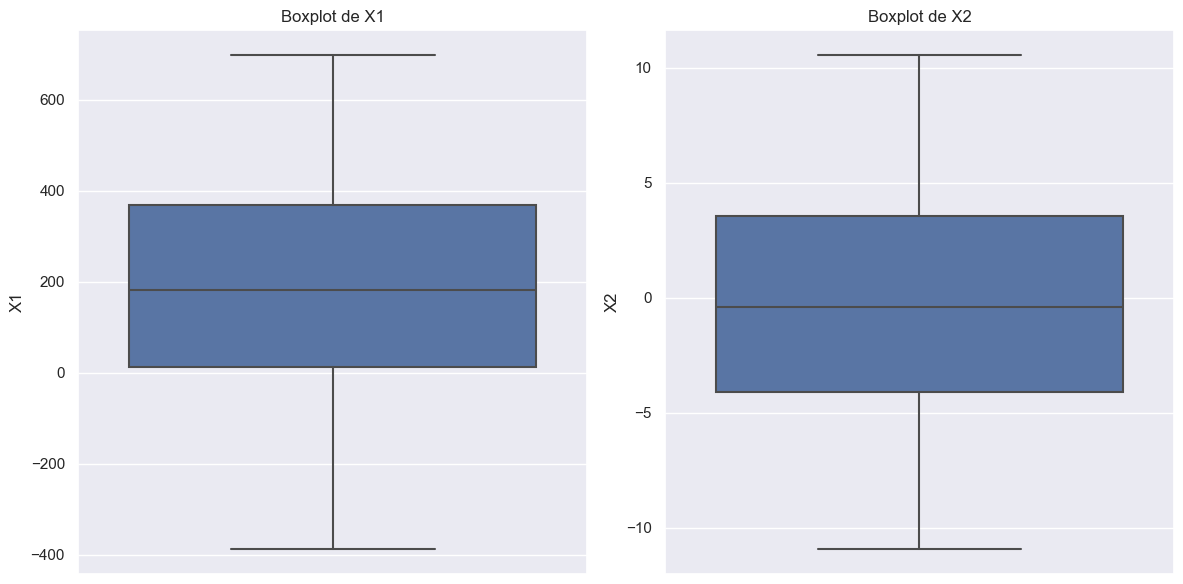

In [93]:
# Crear la figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para X1
sns.boxplot(data=df, y='X1', ax=axes[0])
axes[0].set_title('Boxplot de X1')

# Boxplot para X2
sns.boxplot(data=df, y='X2', ax=axes[1])
axes[1].set_title('Boxplot de X2')

plt.tight_layout()
plt.show()

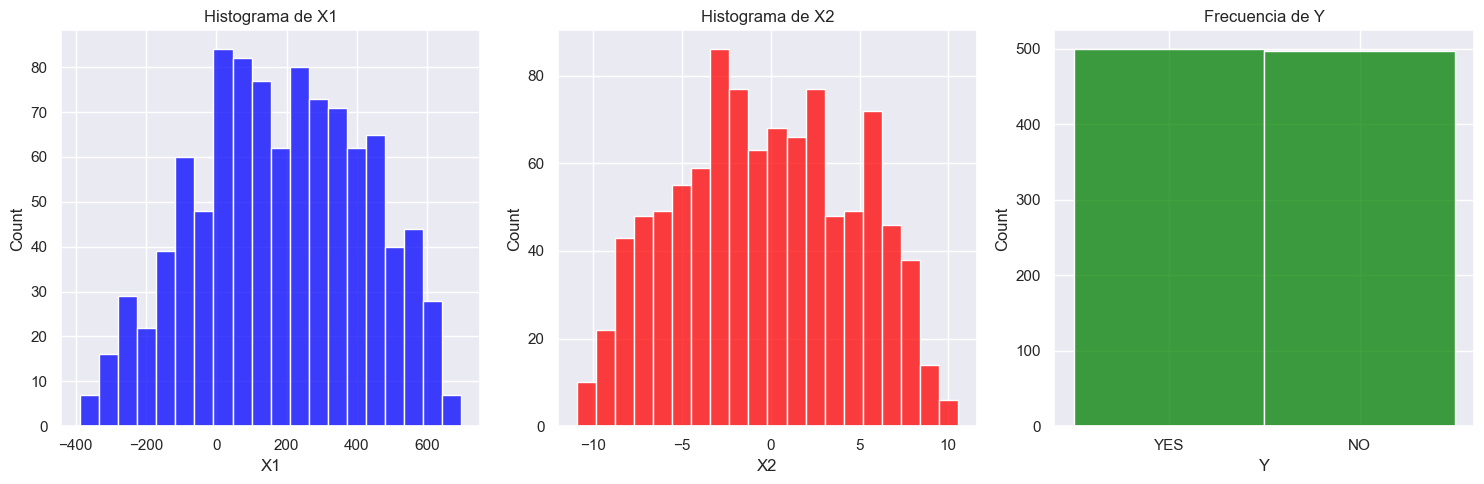

In [94]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.
# Do you see any potential outliers you should take care of?

# Crear una figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para X1
sns.histplot(cleaned_df['X1'], bins=20, kde=False, ax=axes[0], color='blue')
axes[0].set_title('Histograma de X1')

# Histograma para X2
sns.histplot(cleaned_df['X2'], bins=20, kde=False, ax=axes[1], color='red')
axes[1].set_title('Histograma de X2')

# Histograma para Y (conteo de categorías)
sns.histplot(cleaned_df['Y'], discrete=True, ax=axes[2], color='green')
axes[2].set_title('Frecuencia de Y')

plt.tight_layout()
plt.show()


##### Podemos observar que las variables tienen dimenciones muy distintas

## STEP 4: ENCODE CATEGORICAL VARIABLES

In [95]:
# Are there any categorical input variables? If unsure, check it
print(cleaned_df.dtypes)
print("Efectivamente podemos ver que la variable Y es una variable categórica")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

X1    float64
X2    float64
Y      object
dtype: object
Efectivamente podemos ver que la variable Y es una variable categórica
Categorical columns: Index(['Y'], dtype='object')


In [96]:
# Sabemos que la variable categórica es Y. Vamos a cambiar los valores de la columna de NO por un 0 
# y los valores de YES por un 1

# Iterar sobre las filas con iterrows()
for index, row in cleaned_df.iterrows():
    if row['Y'] == 'YES':
        cleaned_df.loc[index, 'Y'] = 1
    elif row['Y'] == 'NO':
        cleaned_df.loc[index, 'Y'] = 0

print(cleaned_df)

             X1        X2  Y
1    604.457235 -4.703332  1
2    492.688339 -0.493488  1
3    438.040887 -2.307669  0
4    184.349042  2.680303  0
5    557.127451 -3.632923  1
..          ...       ... ..
995   19.836513  8.469974  0
996  111.016869  9.406449  0
997   11.893636  0.327663  0
998  524.692740 -5.657276  1
999  -97.142722 -6.531316  1

[996 rows x 3 columns]


## STEP 5: Standardize the numerical variables

In [97]:
# Are the numerical variables in the same scale? If unsure, check it

print("Como hemos podido observar en el paso anterior, las variables X1 y X2 no está en la misma escala")

Como hemos podido observar en el paso anterior, las variables X1 y X2 no está en la misma escala


The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [98]:
# Standardize the numerical variables. 
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to

df_numeric = cleaned_df[["X1", "X2"]]
media_X1 = df_numeric["X1"].mean()
std_X1 = df_numeric["X1"].std()
media_X2 = df_numeric["X2"].mean()
std_X2 = df_numeric["X2"].std()
df_estandarizado = pd.DataFrame()
df_estandarizado["X1"] = (df_numeric["X1"] - media_X1)/ std_X1
df_estandarizado["X2"] = (df_numeric["X2"] - media_X2)/ std_X2
df_estandarizado["Y"] = cleaned_df["Y"]

In [99]:
# Check if your process worked

print(df_estandarizado)

           X1        X2  Y
1    1.766078 -0.881630  1
2    1.297461 -0.029387  1
3    1.068339 -0.396650  0
4    0.004677  0.613117  0
5    1.567637 -0.664936  1
..        ...       ... ..
995 -0.685081  1.785181  0
996 -0.302786  1.974761  0
997 -0.718383  0.136847  0
998  1.431647 -1.074746  1
999 -1.175543 -1.251688  1

[996 rows x 3 columns]


## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

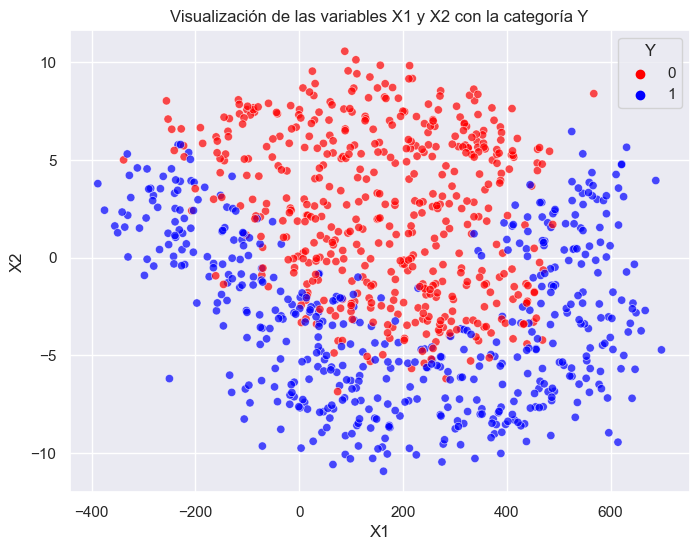

In [100]:
# Do again the scatterplot for the dataset, but now with the processed version

# Visualización con un scatter plot usando Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=cleaned_df, x='X1', y='X2', hue='Y', palette={1: 'blue', 0: 'red'}, alpha=0.7)

plt.title('Visualización de las variables X1 y X2 con la categoría Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Y')
plt.show()

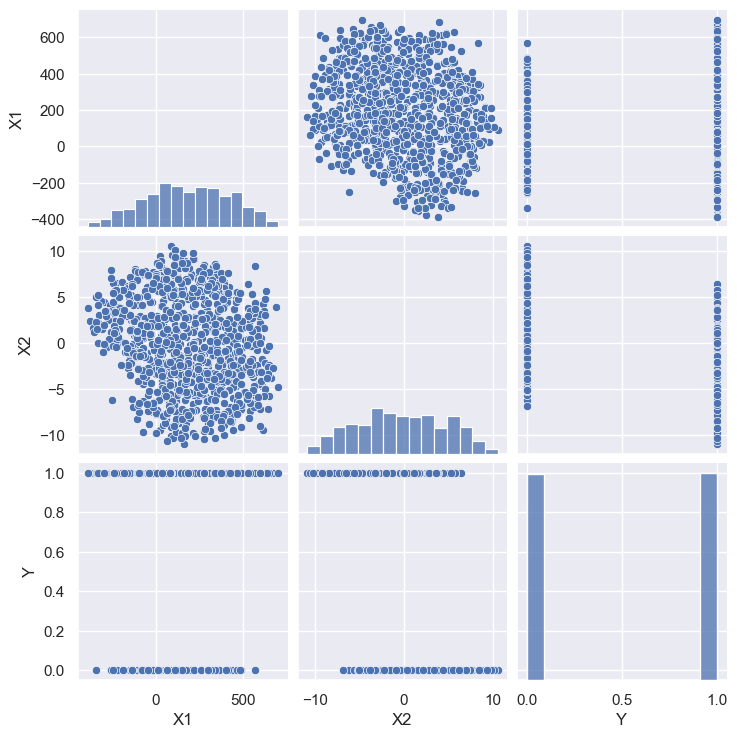

In [101]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)

# Crear un pairplot para ver las relaciones entre todas las variables
sns.pairplot(cleaned_df)
plt.show()

In [102]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas

corr_matrix = cleaned_df.corr()

# Ploteamos la matriz de correlaicón
print(corr_matrix)

          X1        X2         Y
X1  1.000000 -0.189912  0.070976
X2 -0.189912  1.000000 -0.559032
Y   0.070976 -0.559032  1.000000


In [103]:
# Feel free to try any other exploration methods here!

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [104]:
# Count instances for each class

cleaned_df["Y"].value_counts()

# Como podemos observar las clases están balanceadas


Y
1    499
0    497
Name: count, dtype: int64

If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [105]:
# Define input and output variables

# Input variables: X1 y X2
# Output variables: Y

In [106]:
# First: Shuffle the data (check out the .sample() method in pandas)

df_shuffled = cleaned_df.sample(frac=1)

# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)

x = df_shuffled[["X1", "X2"]]  # input variable 

y = df_shuffled["Y"]  # output variables

Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [107]:
# How many rows will the training dataset have?

print(f"El data frame de los entrenados de x tendrá {round(len(x) - len(x)*0.2)} filas")
print(f"El data frame de los entrenados de y tendrá {round(len(y) - len(y)*0.2)} filas")

El data frame de los entrenados de x tendrá 797 filas
El data frame de los entrenados de y tendrá 797 filas


In [108]:
len(x) * 0.2

199.20000000000002

In [109]:
# Perform the split

# Dividir el DataFrame en 80% para entrenamiento y 20% para prueba. Utilizamos la variable input

x_train = x.iloc[:797]
x_test = x.iloc[797:]

y_train = pd.DataFrame(y.iloc[:797])
y_test = pd.DataFrame(y.iloc[797:])


In [110]:
# Check whether the shape of all dataframes is correct

print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

(797, 2)
(199, 2)
(797, 1)
(199, 1)


In [112]:
# See how convenient sklearn becomes here, for example...
'''
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y
'''

'\nx_train, x_test, y_train, y_test = train_test_split(x, y,\n                                                    test_size=0.2,  # percentage of test data\n                                                    random_state=0, # seed for replication\n                                                    stratify = y)   # Preserves distribution of y\n'

### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

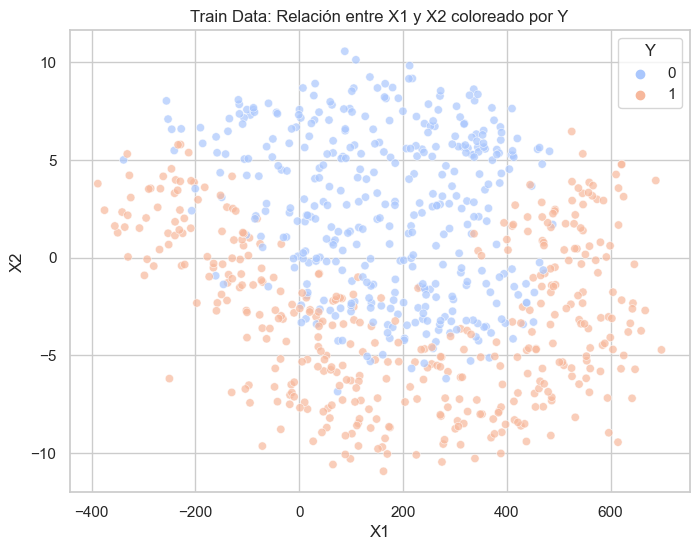

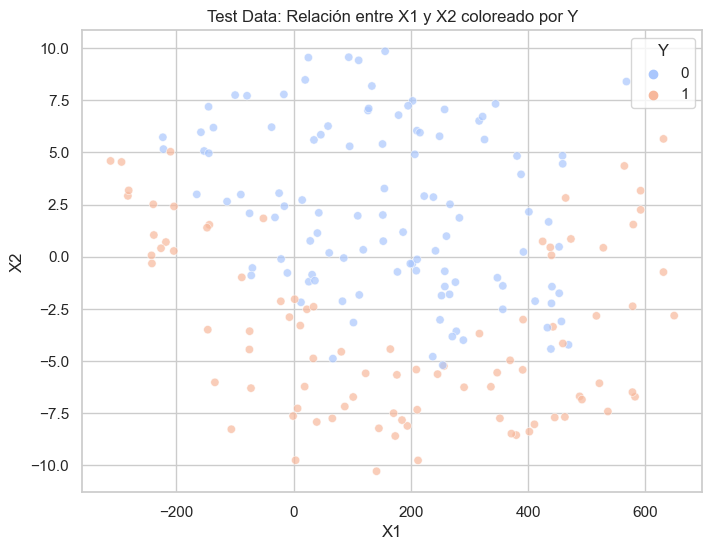

In [119]:
# To make plotting easier, group together train data and test data

# Unir x_train e y_train en un solo DataFrame llamado train_data
train_data = pd.concat([x_train, y_train], axis=1)

# Unir x_test e y_test en un solo DataFrame llamado test_data
test_data = pd.concat([x_test, y_test], axis=1)

# Plot de train and test data

# Crear scatterplot para Train Data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x="X1", y="X2", hue="Y", palette="coolwarm", alpha=0.7)
plt.title("Train Data: Relación entre X1 y X2 coloreado por Y")
plt.show()

# Crear scatterplot para Test Data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x="X1", y="X2", hue="Y", palette="coolwarm", alpha=0.7)
plt.title("Test Data: Relación entre X1 y X2 coloreado por Y")
plt.show()


In [114]:
# Mostrar la estructura de los nuevos DataFrames
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
             X1        X2  Y
645   53.042729 -8.701369  1
636  271.139175  8.268480  0
404  -62.886678  5.675695  0
388   29.354068  7.039540  0
786   20.954733 -2.676865  1

Test Data:
             X1        X2  Y
919  176.181059 -5.659535  1
333  410.643729 -8.030037  1
344  -21.735348 -2.136547  1
596 -221.846026  5.154211  0
984  152.932472  0.744065  0


In [116]:
# Store the train and test datasets to use it later
# your_dataset_name_here.to_csv("train.dat", sep = "\t", index = False)
# your_dataset_name_here.to_csv("test.dat", sep = "\t", index = False)

train_data.to_csv("train.dat", sep = "\t", index = False)
test_data.to_csv("test.dat", sep = "\t", index = False)

### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!